# PCA ON OSMIA OCCURRENCE POINTS ONLY, AMERICA TRANFORMED TO OSMIA PCA SPACE, MAHAL DIST BETWEEN

In [2]:
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import pandas as pd
import rasterio
import matplotlib.pyplot as plt

In [3]:
crta_coords = pd.read_csv('calculate_aoo/df2csv/cornuta_all.csv')
crta_coords = crta_coords[(crta_coords['lat']>0) & (crta_coords['long']>-20)]
#print(f'lat_min = {crta_coords['lat'].min()}\nlat_max = {crta_coords['lat'].max()}\nlon_min = {crta_coords['long'].min()}\nlat_max = {crta_coords['long'].max()}\n')

In [4]:
america = pd.read_csv('data/csv/10k_america_bioclim_ndvi.csv', index_col=None)
america = america.drop(columns='Unnamed: 0')
america = america[america['bio_13']!= -3.4e+38]
america = america[america['elev']> 0]
america_points = america[['lat', 'lon']].reset_index(drop=True)
# america = america.drop(columns=['lat', 'lon', 'bio_8', 'bio_4', 'bio_7'])
america = america.drop(columns=['lat', 'lon'])
america['elev'] = np.log(america['elev'] + 1) # log transform
# america['elev'] = np.sqrt(america['elev']) #sqrt transform
america = america[['bio_1', 'bio_2', 'bio_3', 'bio_9', 'bio_10', 'bio_11', 'bio_12', 'bio_15', 'bio_16', 'bio_17', 'bio_18', 'bio_19', 'elev', 'ndvi']]

#america['group'] = 'america'


In [5]:
america

,bio_1,bio_2,bio_3,bio_9,bio_10,bio_11,bio_12,bio_15,bio_16,bio_17,bio_18,bio_19,elev,ndvi
0,21.995832,17.875000,61.215750,21.633333,28.133333,17.050000,136.0,93.943000,76.0,1.0,76.0,41.0,3.688879,0.135494
1,22.712500,17.525000,59.406780,23.733334,28.916666,17.033333,255.0,122.397385,180.0,1.0,180.0,45.0,5.968708,0.144761
2,24.941666,16.033333,59.825870,23.283333,29.933334,19.433334,650.0,120.599450,477.0,7.0,349.0,55.0,3.610918,0.299956
3,24.525000,15.700000,59.923664,24.316668,28.600000,19.783333,928.0,111.806800,640.0,16.0,554.0,91.0,5.888878,0.388679
4,14.679167,13.891667,63.143940,14.716667,17.533333,11.016666,1283.0,91.926125,774.0,56.0,699.0,194.0,7.711549,0.406841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6600,-4.612500,10.225000,21.848290,-19.916666,10.650000,-21.450000,804.0,31.745638,291.0,137.0,269.0,144.0,6.226537,0.192897
6601,-4.508333,9.433333,20.916483,-20.833334,10.166667,-20.833334,809.0,28.685783,284.0,149.0,284.0,149.0,6.146329,-0.086839
6602,-4.412500,10.425000,22.419355,-19.500000,10.750000,-20.950000,864.0,28.639341,303.0,160.0,284.0,162.0,6.216606,0.155556
6603,-4.462500,9.258333,21.581196,-20.066666,9.533334,-20.066666,878.0,23.458233,290.0,173.0,290.0,173.0,6.146329,-0.082520


In [6]:
bio_columns = [col for col in america.columns if col.startswith('bio_')]
other_columns = [col for col in america.columns if not col.startswith('bio_')]
bio_columns_sorted = sorted(bio_columns, key=lambda x: (x.split('_')[0], int(x.split('_')[1])))
other_columns_sorted = sorted(other_columns)
sorted_columns = bio_columns_sorted + other_columns_sorted
america = america[sorted_columns]

In [7]:
america.describe()

,bio_1,bio_2,bio_3,bio_9,bio_10,bio_11,bio_12,bio_15,bio_16,bio_17,bio_18,bio_19,elev,ndvi
count,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000
mean,8.379412,13.170054,34.686399,1.989141,19.782900,-3.609023,745.135425,42.666961,275.061668,110.543076,224.174139,155.037337,6.100226,0.235197
std,6.865420,2.420581,9.044435,12.744884,5.157114,9.630384,412.019893,22.180030,146.538098,83.993989,104.611049,149.920757,1.170201,0.099214
min,-5.608333,5.558333,18.310658,-21.066668,0.833333,-22.516666,60.000000,5.816862,24.000000,0.000000,2.000000,17.000000,0.693147,-0.194264
25%,2.720833,11.466667,26.796895,-8.766666,15.750000,-10.800000,416.000000,23.083239,189.000000,42.000000,150.000000,54.000000,5.541264,0.166246
50%,7.679167,12.658334,34.080300,-1.433333,19.516666,-3.800000,695.000000,40.438663,269.000000,80.000000,238.000000,108.000000,6.142037,0.242886
75%,13.572916,14.916667,40.714015,14.483334,23.966667,3.591667,1009.000000,58.471063,329.000000,171.000000,297.000000,209.000000,7.021976,0.304186
max,24.941666,21.108334,70.047165,29.100000,34.783333,20.933334,4233.000000,123.681450,1645.000000,521.000000,699.000000,1384.000000,8.275631,0.534848


In [8]:
osmia = pd.read_csv('data/csv/bioclim.csv')
osmia = osmia.drop(columns=['Unnamed: 0'])

osmia = osmia[osmia['bio_13']!=-3.4e+38]
osmia = osmia[osmia['elev']> 0]
# coords = osmia[['lat', 'lon']]
# osmia = osmia.drop(columns=['lat', 'lon'])
# osmia['group'] = 'osmia'


crta_coords_filtered = pd.read_csv('data/csv/crta_coords_filtered.csv')
crta_coords_filtered.columns = ['lat', 'lon']
osmia = pd.merge(osmia, crta_coords_filtered, on=['lat', 'lon'])
osmia = osmia.drop_duplicates(subset=['lat', 'lon'])
osmia = osmia[osmia['bio_13']!=-3.4e+38]
osmia['elev'] = np.log(osmia['elev'] + 1)
# osmia['elev'] = np.sqrt(osmia['elev'])
osmia_coords = osmia[['lat', 'lon']]
osmia = osmia.drop(columns=['lat', 'lon'])
#osmia['group'] = 'osmia'
osmia = osmia[sorted_columns]

In [9]:
osmia.describe()

,bio_1,bio_2,bio_3,bio_9,bio_10,bio_11,bio_12,bio_15,bio_16,bio_17,bio_18,bio_19,elev,ndvi
count,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000
mean,10.009688,8.278501,33.389905,6.091684,17.816422,2.525564,774.406914,18.623511,235.904033,154.334486,212.502058,179.278848,4.624528,0.256794
std,1.356123,0.899696,2.355533,4.892664,1.560124,1.817177,157.878150,8.645285,54.258283,37.393388,57.132840,46.886702,1.323140,0.067896
min,-0.629167,5.083334,22.902868,-6.300000,5.883333,-6.516667,328.000000,7.727378,116.000000,6.000000,6.000000,64.000000,0.693147,-0.055812
25%,9.325000,7.691667,32.142857,3.716667,16.900000,1.400000,668.000000,13.031209,204.000000,133.000000,188.000000,151.000000,3.850148,0.218283
50%,9.900000,8.141666,33.234127,5.550000,17.450000,2.566667,772.000000,15.465448,223.000000,156.000000,204.000000,183.000000,4.867534,0.263979
75%,10.416667,8.666667,34.599107,6.283333,18.391666,3.500000,836.000000,21.676554,251.000000,173.000000,226.000000,199.000000,5.564520,0.303745
max,18.087500,13.800000,46.227200,25.233334,25.233334,11.600000,1921.000000,88.891600,570.000000,428.000000,552.000000,557.000000,7.816014,0.460837


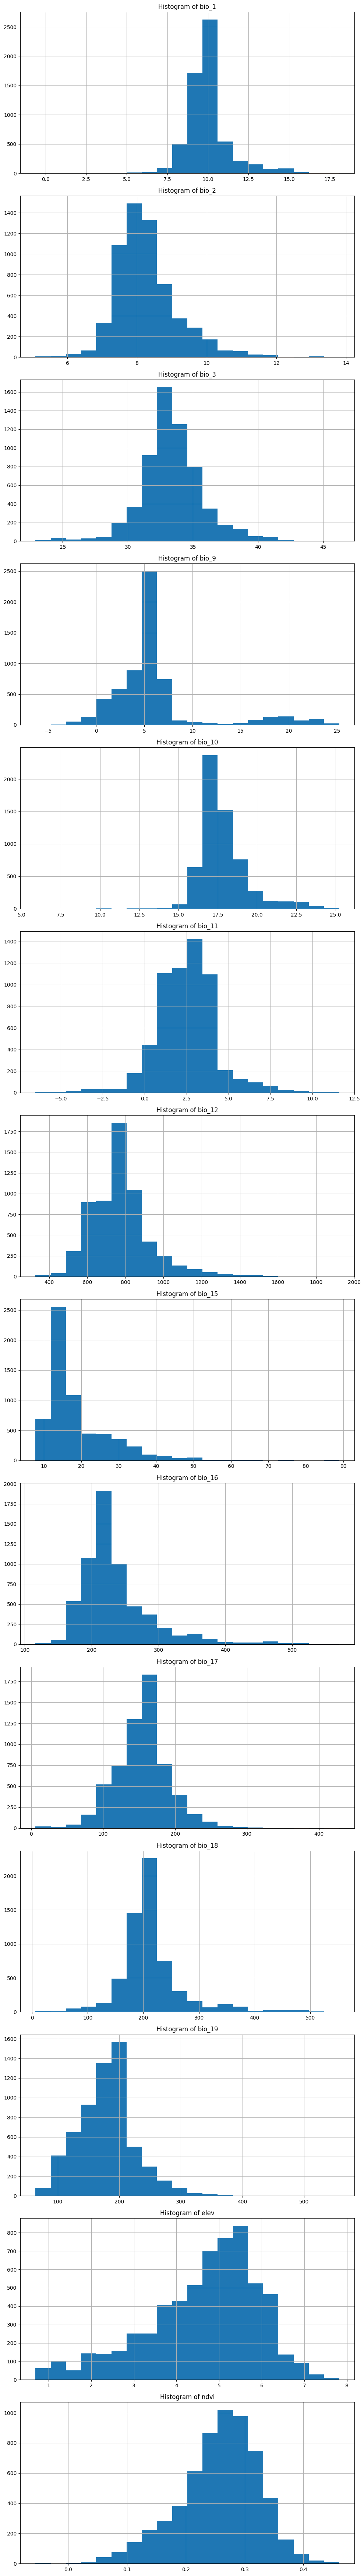

In [10]:
plt.figure(figsize=(10, 5 * len(osmia.columns)))

# Iterate over the columns
for i, column in enumerate(osmia.columns):
    # Create a subplot for each column
    plt.subplot(len(osmia.columns), 1, i + 1)
    # Plot the histogram
    osmia[column].hist(bins=20)
    # Set title
    plt.title(f'Histogram of {column}')

# Adjust layout for better readability
plt.tight_layout()
plt.savefig('figures/histograms/all_data_distributions.png', format='png', dpi=300)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
scaler.fit(osmia)

osmia_scaled = pd.DataFrame(scaler.transform(osmia), columns=osmia.columns)
america_scaled = pd.DataFrame(scaler.transform(america), columns=osmia.columns)

In [13]:
osmia_scaled.describe()

,bio_1,bio_2,bio_3,bio_9,bio_10,bio_11,bio_12,bio_15,bio_16,bio_17,bio_18,bio_19,elev,ndvi
count,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03
mean,8.421247e-16,1.066691e-15,6.035227e-16,1.193010e-16,-1.450326e-16,-1.403541e-16,-3.181360e-16,-5.614165e-17,-2.011742e-16,-6.549859e-17,1.380149e-16,-1.637465e-16,2.105312e-16,1.309972e-16
std,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00
min,-7.845699e+00,-3.551678e+00,-4.452453e+00,-2.532916e+00,-7.649436e+00,-4.976385e+00,-2.827774e+00,-1.260459e+00,-2.210057e+00,-3.967191e+00,-3.614717e+00,-2.458871e+00,-2.971495e+00,-4.604584e+00
25%,-5.049280e-01,-6.523120e-01,-5.294557e-01,-4.854642e-01,-5.874518e-01,-6.194532e-01,-6.740367e-01,-6.469148e-01,-5.880514e-01,-5.705886e-01,-4.288965e-01,-6.031812e-01,-5.853078e-01,-5.672621e-01
50%,-8.089015e-02,-1.521025e-01,-6.613810e-02,-1.107227e-01,-2.348868e-01,2.262090e-02,-1.524664e-02,-3.653232e-01,-2.378456e-01,4.454401e-02,-1.488243e-01,7.937130e-02,1.836740e-01,1.058235e-01
75%,3.001296e-01,4.314772e-01,5.133876e-01,3.917387e-02,3.687471e-01,5.362803e-01,3.901626e-01,3.531744e-01,2.782471e-01,4.992073e-01,2.362749e-01,4.206475e-01,7.104840e-01,6.915692e-01
max,5.957040e+00,6.137579e+00,5.450296e+00,3.912639e+00,4.754442e+00,4.994110e+00,7.263117e+00,8.128578e+00,6.158018e+00,7.319156e+00,5.942745e+00,8.056703e+00,2.412253e+00,3.005473e+00


<Axes: >

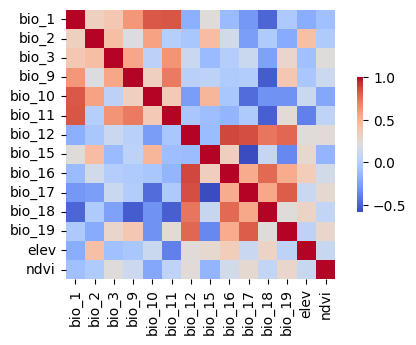

In [14]:
import seaborn as sns

cov_reduced = osmia_scaled.cov()

plt.figure(figsize=(5.5, 3.5))  # Optional: Adjust the figure size as needed
sns.heatmap(cov_reduced, annot=False, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': .5})

In [15]:
america_scaled.describe()

,bio_1,bio_2,bio_3,bio_9,bio_10,bio_11,bio_12,bio_15,bio_16,bio_17,bio_18,bio_19,elev,ndvi
count,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000
mean,-1.202259,5.437344,0.550449,-0.838578,1.260566,-3.376166,-0.185421,2.781334,0.721749,-1.171197,0.204314,-0.517066,1.115392,-0.318128
std,5.062953,2.690666,3.839972,2.605111,3.305851,5.300075,2.609948,2.565775,2.700973,2.246411,1.831165,3.197774,0.884485,1.461387
min,-11.517621,-3.023679,-6.402156,-5.551289,-10.886623,-13.781973,-4.525425,-1.481467,-3.905790,-4.127660,-3.684735,-3.461370,-2.971495,-6.643942
25%,-5.375218,3.543896,-2.799177,-3.037113,-1.324633,-7.333715,-2.270336,0.515899,-0.864530,-3.004374,-1.094068,-2.672168,0.692906,-1.333751
50%,-1.718659,4.868527,0.293119,-1.538147,1.089902,-3.481270,-0.503005,2.523566,0.610021,-1.988068,0.446329,-1.520361,1.146995,-0.204872
75%,2.627728,7.378841,3.109578,1.715291,3.942474,0.586729,1.486035,4.609545,1.715934,0.445717,1.479095,0.633945,1.812088,0.698059
max,11.011694,14.261364,15.563475,4.703003,10.876252,10.130703,21.908527,12.153050,25.972292,9.806432,8.515908,25.696419,2.759650,4.095631


In [16]:
# combined = pd.concat([europe, america, osmia], ignore_index=True)
# combined_points = pd.concat([europe_points, america_points, osmia_coords], ignore_index=True)
# combined.describe()
# combined_vars = combined.drop(columns=['group'])
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(combined_vars)
# combined_scaled = pd.DataFrame(df_scaled, columns=combined_vars.columns)
# bio_columns = [col for col in combined_scaled.columns if col.startswith('bio_')]


# other_columns = [col for col in combined_scaled.columns if not col.startswith('bio_')]
# bio_columns_sorted = sorted(bio_columns, key=lambda x: (x.split('_')[0], int(x.split('_')[1])))
# other_columns_sorted = sorted(other_columns)
# sorted_columns = bio_columns_sorted + other_columns_sorted
# combined_scaled = combined_scaled[sorted_columns]

In [17]:
from scipy.spatial import distance
from scipy.stats import chi2

osmia_scaled_mean = osmia_scaled.mean()
osmia_scaled_cov = osmia_scaled.cov()

def mahalanobis_distance(x, mean, cov):
    x_minus_mu = x - mean
    cov_inv = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, cov_inv)
    mahal = np.dot(left_term, x_minus_mu.T)
    return np.sqrt(mahal)

mahal_raw_distances = america_scaled.apply(lambda x: mahalanobis_distance(x, osmia_scaled_mean, osmia_scaled_cov), axis=1)
mahal_raw_eur_distances = osmia_scaled.apply(lambda x: mahalanobis_distance(x, osmia_scaled_mean, osmia_scaled_cov), axis=1)

In [18]:
mahal_raw_distances

0       33.896757
1       39.971395
2       29.280998
3       29.948802
4       30.976171
          ...    
6530    22.155729
6531    22.049392
6532    21.318474
6533    21.334436
6534    21.370341
Length: 6535, dtype: float64

In [19]:
mahal_distances.max()

NameError: name 'mahal_distances' is not defined

In [ ]:
combined_scaled = pd.concat([osmia_scaled, america_scaled])

combined_scaled.describe()

,bio_1,bio_2,bio_3,bio_9,bio_10,bio_11,bio_12,bio_15,bio_16,bio_17,bio_18,bio_19,elev,ndvi
count,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000
mean,-0.623058,2.817846,0.285264,-0.434584,0.653275,-1.749662,-0.096092,1.441397,0.374039,-0.606960,0.105884,-0.267964,0.578040,-0.164867
std,3.758459,3.408128,2.863307,2.043088,2.557694,4.229012,2.005064,2.413453,2.095776,1.854542,1.493264,2.418172,1.094454,1.270341
min,-11.517621,-3.551678,-6.402156,-5.551289,-10.886623,-13.781973,-4.525425,-1.481467,-3.905790,-4.127660,-3.684735,-3.461370,-2.971495,-6.643942
25%,-2.059733,-0.133576,-1.105514,-1.688044,-0.704973,-3.735806,-1.269482,-0.434568,-0.661779,-2.175282,-0.621446,-1.818978,-0.007111,-0.930275
50%,-0.240673,2.089581,-0.024017,-0.226552,0.005498,-0.527728,-0.091261,0.503514,-0.071959,-0.383374,-0.061302,-0.347224,0.716254,-0.018510
75%,0.575908,4.998211,1.387919,0.260612,1.859136,0.536280,0.782903,2.886110,1.162977,0.499207,0.971464,0.484637,1.290199,0.693947
max,11.011694,14.261364,15.563475,4.703003,10.876252,10.130703,21.908527,12.153050,25.972292,9.806432,8.515908,25.696419,2.759650,4.095631


In [ ]:
# no_osmia_ind = combined[combined['group'] != 'osmia'].index
# combined_filtered = combined_scaled.loc[no_osmia_ind]
# combined_clipped = combined.loc[no_osmia_ind]



# yes_osmia_ind = combined[combined['group'] == 'osmia'].index
# osmia_scaled = combined_scaled.loc[yes_osmia_ind]

In [ ]:
# america_index = combined[combined['group'] == 'america'].index
# america_df = combined_scaled.loc[america_index]

In [ ]:
# osmia_scaled.describe()

Explained Variance Ratio: [0.31948939 0.23328314 0.18186682 0.08347643]
Total explained variance: 0.8181157805700288


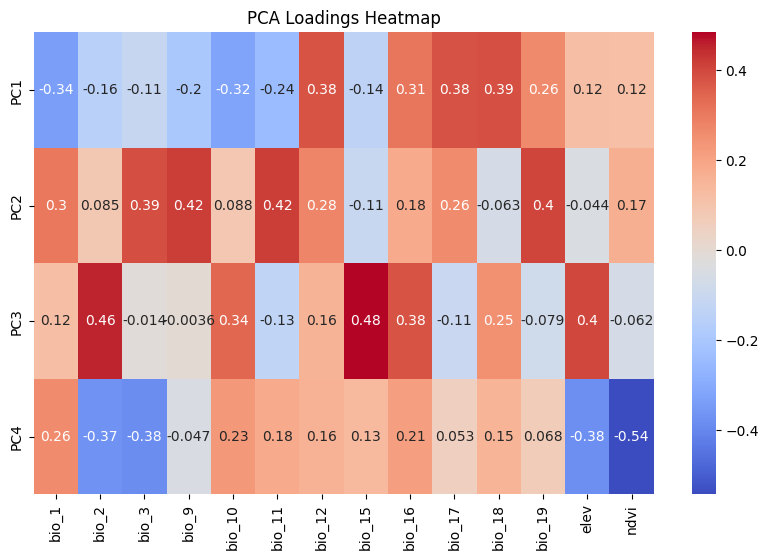

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=4) 
pca_result = pca.fit_transform(osmia_scaled) 
loadings = pca.components_
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", pca.explained_variance_ratio_.sum())
loadings_df = pd.DataFrame(loadings, columns=combined_scaled.columns, index=[f'PC{i+1}' for i in range(loadings.shape[0])])
plt.figure(figsize=(10, 6))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm')
plt.title('PCA Loadings Heatmap')
plt.savefig('figures/pca_plots/loadings_heatmap.png', format='png', dpi=300)

In [ ]:
n_components = pca_result.shape[1]

for i in range(n_components):
    osmia_scaled[f'PC{i+1}'] = pca_result[:, i]


In [ ]:
america_pca = pca.transform(america_scaled)
for i in range(n_components):
    america_scaled[f'PC{i+1}'] = america_pca[:, i]

In [ ]:
america_scaled

,bio_1,bio_2,bio_3,bio_9,bio_10,bio_11,bio_12,bio_15,bio_16,bio_17,bio_18,bio_19,elev,ndvi,PC1,PC2,PC3,PC4
0,8.839268,10.667260,11.813945,3.176782,6.613421,7.993513,-4.044001,8.712921,-2.947332,-4.100915,-2.389401,-2.949455,-0.707201,-1.786712,-17.843608,8.503575,9.317741,-3.029981
1,9.367779,10.278208,11.045915,3.606032,7.115559,7.984340,-3.290194,12.004510,-1.030417,-4.100915,-0.568933,-2.864136,1.015985,-1.650214,-16.744918,8.621851,12.948564,-1.833408
2,11.011694,8.620103,11.223847,3.514050,7.767271,9.305179,-0.788058,11.796526,4.443853,-3.940446,2.389329,-2.650839,-0.766127,0.635750,-13.595925,11.729599,14.635693,0.990565
3,10.704421,8.249577,11.265368,3.725268,6.912567,9.497801,0.972938,10.779397,7.448249,-3.699742,5.977754,-1.882967,0.955646,1.942619,-9.479994,13.146486,16.444765,0.898745
4,3.443541,6.239474,12.632592,1.762985,-0.181468,4.673072,3.221693,8.479610,9.918122,-2.629946,8.515908,0.313999,2.333294,2.210141,1.048992,10.151019,13.915505,-2.665803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6530,-10.783237,2.163686,-4.900193,-5.316223,-4.593872,-13.194935,0.187458,1.517961,1.015522,-0.463609,0.988969,-0.752490,1.210863,-0.941194,9.805742,-13.790869,1.987910,-4.348184
6531,-10.706418,1.283687,-5.295807,-5.503594,-4.903702,-12.855553,0.219131,1.163999,0.886499,-0.142670,1.251536,-0.645841,1.150239,-5.061609,9.789423,-14.517161,1.490519,-1.596422
6532,-10.635746,2.386002,-4.657737,-5.231055,-4.529769,-12.919760,0.567529,1.158626,1.236705,0.151524,1.251536,-0.368554,1.203357,-1.491209,10.221832,-13.083403,2.059186,-3.964363
6533,-10.672618,1.089160,-5.013592,-5.346884,-5.309686,-12.433618,0.656212,0.559278,0.997091,0.499207,1.356563,-0.133926,1.150239,-4.997980,10.481973,-13.620399,0.939957,-1.584046


In [ ]:
# combined_filtered['group'] = combined_clipped['group']
america_scaled['group'] = 'america'
osmia_scaled['group'] = 'osmia'

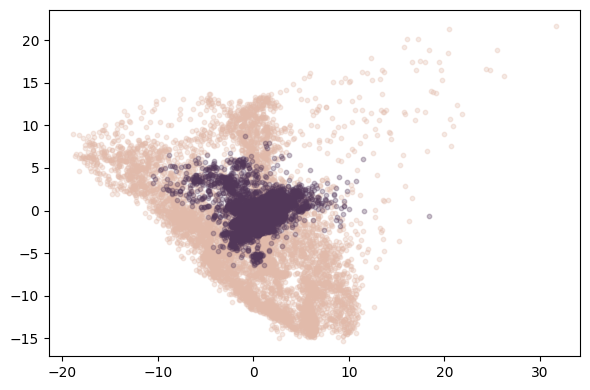

In [ ]:
colors = ['#E1BAAA', '#523759', '#00B6BE','#E73F88']

plt.figure(figsize=(6, 4))

# unique_labels = combined['group'].unique()  
# for i, label in enumerate(unique_labels):
#     subset = combined_filtered[combined_filtered['group'] == label]  
#     plt.scatter(subset['PC1'], subset['PC2'], c=colors[i], label=label, s=10, marker= 'o', alpha=0.5)

plt.scatter(america_scaled['PC1'], america_scaled['PC2'], c='#E1BAAA', label='america', s=10, marker= 'o', alpha=0.3)
plt.scatter(osmia_scaled['PC1'], osmia_scaled['PC2'], c='#523759', label='osmia', s=10, marker= 'o', alpha=0.3)
# plt.legend()
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
plt.tight_layout()

plt.savefig('figures/pca_plots/pca_osmia_mahal.svg', format='svg')

In [ ]:
osmia_scaled[osmia_scaled['PC1']>20]

,bio_1,bio_2,bio_3,bio_9,bio_10,bio_11,bio_12,bio_15,bio_16,bio_17,bio_18,bio_19,elev,ndvi,PC1,PC2,PC3,PC4,group


In [ ]:
# osmia_scaled.reset_index(inplace=True)
# osmia_scaled[osmia_scaled['PC1']<-6]

In [ ]:
osmia_coords.iloc[3666]

lat    46.908023
lon     9.470915
Name: 12566, dtype: float64

In [ ]:
# osmia_coords.iloc[3666]['lat']
# plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
# ax = plt.gca()
# ax.set_extent([-11, 53, 34,  66]) 

# ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='gray', linewidth=.5)
# ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
# ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
# ax.add_feature(lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')

# ax.scatter(osmia_coords.iloc[3666]['lon'], osmia_coords.iloc[3666]['lat'], transform=ccrs.PlateCarree(), marker='o', color='red', s=3)
# ax.axis('off')

In [ ]:
osmia_pca_df = osmia_scaled.iloc[:, -(n_components+1):-1].reset_index(drop=True)
# america_pca_df = combined_filtered[combined_filtered['group'] == 'america']
america_pca_df = america_scaled.iloc[:, -(n_components+1):-1].reset_index(drop=True)
# europe_pca_df = combined_filtered[combined_filtered['group'] == 'europe']
# europe_pca_df = europe_pca_df.iloc[:, -6:-1].reset_index(drop=True)


In [ ]:
from scipy.spatial import distance
from scipy.stats import chi2

osmia_mean = osmia_pca_df.mean()
osmia_cov = osmia_pca_df.cov()

def mahalanobis_distance(x, mean, cov):
    x_minus_mu = x - mean
    cov_inv = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, cov_inv)
    mahal = np.dot(left_term, x_minus_mu.T)
    return np.sqrt(mahal)

mahal_distances = america_pca_df.apply(lambda x: mahalanobis_distance(x, osmia_mean, osmia_cov), axis=1)

In [ ]:
osmia_scaled

,bio_1,bio_2,bio_3,bio_9,bio_10,bio_11,bio_12,bio_15,bio_16,bio_17,bio_18,bio_19,elev,ndvi,PC1,PC2,PC3,PC4,group
0,-0.240673,-0.253996,-1.470809,-0.812511,0.459559,-0.784558,-0.705709,0.800076,-0.108822,-0.784548,0.306293,-1.008447,0.509277,-1.460163,-0.477841,-2.502485,0.906046,1.101335,osmia
1,-0.000999,-0.105786,-1.308203,-0.737563,0.641183,-0.619453,-0.819731,0.992615,-0.164118,-0.918272,0.253779,-1.157755,0.110471,-1.553248,-0.969357,-2.389403,0.952886,1.287175,osmia
2,-0.455765,-0.680102,-0.781135,-0.236772,-0.298990,-0.399313,-1.003432,-0.165338,-0.864530,-0.677568,-0.411392,-0.923128,-0.183292,-1.152617,-0.856496,-1.923603,-0.926229,0.468568,osmia
3,0.042020,-0.050206,-1.277354,-0.734156,0.694603,-0.610281,-0.914748,0.972906,-0.293141,-1.105487,0.131248,-1.243074,0.036508,-0.640384,-1.130477,-2.316433,0.836828,0.732410,osmia
4,-0.185363,-0.013155,0.149275,-0.100503,-0.234887,-0.059931,-0.496670,-0.548393,-0.588051,-0.196160,-0.218842,-0.475203,0.091006,0.478586,-0.353389,-0.426024,-0.656348,-0.810518,osmia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6070,0.014365,0.292530,-0.120012,-0.584260,0.363405,-0.252554,-1.332827,0.138876,-0.993553,-1.212466,-0.831500,-1.328393,0.513047,-0.218292,-1.902285,-1.764670,0.024018,-0.762016,osmia
6071,0.238674,0.542634,0.029998,-0.536565,0.587765,-0.151656,-1.104784,0.192909,-0.735506,-0.998507,-0.656455,-1.072436,-0.029901,0.044753,-1.798391,-1.213392,0.151471,-0.567890,osmia
6072,0.499857,0.162845,-0.418648,-0.468431,0.844176,0.022621,-0.952756,0.679245,-0.385301,-1.025252,-0.358878,-1.200415,-0.069483,-0.539434,-1.819772,-1.338603,0.578606,0.432199,osmia
6073,-0.154636,-0.661575,-1.022665,-0.618327,0.064259,-0.298416,-1.066777,-0.218543,-0.956689,-0.784548,-0.831500,-0.773819,0.331109,0.675260,-0.928332,-1.696684,-0.848255,-0.533359,osmia


In [ ]:
mahal_distances

0       11.629996
1       12.415727
2       12.976677
3       13.412105
4       10.672945
          ...    
6530     9.871387
6531     9.433591
6532     9.532589
6533     9.156801
6534     8.619608
Length: 6535, dtype: float64

In [ ]:
mahal_distances_eur = osmia_pca_df.apply(lambda x: mahalanobis_distance(x, osmia_mean, osmia_cov), axis=1)

Text(0.5, 1.0, 'distribution of mahal distances, america to eur')

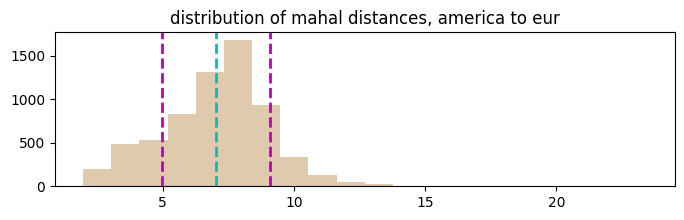

In [ ]:
mean = np.mean(mahal_distances)
std_dev = np.std(mahal_distances)

plt.figure(figsize=(8, 2))

# Create histogram
plt.hist(mahal_distances, bins=20, alpha=0.7, color='tan')

# Mark the mean
plt.axvline(mean, color='c', linestyle='dashed', linewidth=2, label='Mean')

# Mark one standard deviation on either side of the mean
plt.axvline(mean + std_dev, color='m', linestyle='dashed', linewidth=2, label='+1 STD')
plt.axvline(mean - std_dev, color='m', linestyle='dashed', linewidth=2, label='-1 STD')
plt.title('distribution of mahal distances, america to eur')

Text(0.5, 1.0, 'distribution of mahal distances, eur to eur')

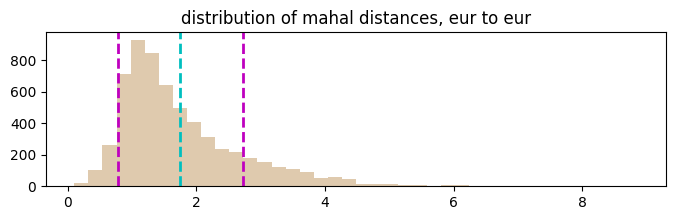

In [ ]:
mean = np.mean(mahal_distances_eur)
std_dev = np.std(mahal_distances_eur)
# z = 1.96
# upper_bound = mean + z * std_dev

plt.figure(figsize=(8, 2))

plt.hist(mahal_distances_eur, bins=40, alpha=0.7, color='tan')

# Mark the mean
plt.axvline(mean, color='c', linestyle='dashed', linewidth=2, label='Mean')

# Mark one standard deviation on either side of the mean
plt.axvline(mean + std_dev, color='m', linestyle='dashed', linewidth=2, label='+1 STD')
plt.axvline(mean - std_dev, color='m', linestyle='dashed', linewidth=2, label='-1 STD')
# plt.axvline(upper_bound, color='k', linestyle='dashed', linewidth=2, label='-1 STD')
plt.title('distribution of mahal distances, eur to eur')

In [ ]:
mean

NameError: name 'mean' is not defined

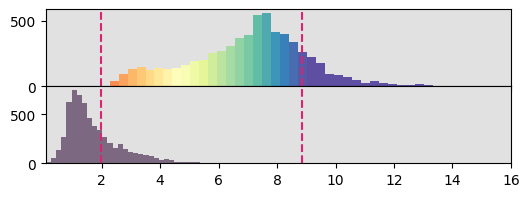

In [ ]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm

fig, axs = plt.subplots(2, 1, figsize=(6, 2), sharex=True)
plt.gca().set_facecolor('#e1e1e1')


n, bins, patches = axs[0].hist(mahal_distances, bins=70)
cmap = cm.Spectral
norm = mcolors.Normalize(vmin=min(mahal_distances_eur), vmax=max(mahal_distances_eur))
for bin, patch in zip(bins, patches):
    color = cmap(norm(bin))
    patch.set_facecolor(color)
axs[0].set_facecolor('#e1e1e1')


axs[1].hist(mahal_distances_eur, color = '#523759', bins=50, alpha=0.7, label='europe - europe')

x_min = min(mahal_distances_eur)
x_max = max(mahal_distances)
axs[0].set_xlim(x_min, 16)
axs[1].set_xlim(x_min, 16)

for ax in axs:
    ax.axvline(min(mahal_distances), color='#dd2270', linestyle='--', ymin=0, ymax=2) 
    ax.axvline(max(mahal_distances_eur), color='#dd2270', linestyle='--', ymin=0, ymax=2)

plt.subplots_adjust(hspace=0)
plt.savefig('figures/histograms/colormap_hist.svg', format='svg')

# plt.figure(figsize=(10,3))
# n, bins, patches = plt.hist(distance_points['normalized'], bins=80)

# cmap = cm.coolwarm_r
# norm = mcolors.Normalize(vmin=0, vmax=0.4)
# for bin, patch in zip(bins, patches):
#     color = cmap(norm(bin))
#     patch.set_facecolor(color)
# plt.gca().set_facecolor('#e1e1e1')
# plt.ylabel('Counts')
# plt.xlabel('Normalized minimum distance to native range point')
# plt.tight_layout()


In [ ]:
print('Euro range of distances:', mahal_distances_eur.min(), mahal_distances_eur.max())

Euro range of distances: 0.09931243807374758 8.86506995439123


In [ ]:
print('Range of mahal distances:', mahal_distances.min(), mahal_distances.max())

Range of mahal distances: 1.9696040182284122 23.43746262017049


In [ ]:
len(mahal_distances[mahal_distances<mahal_distances_eur.max()])/len(mahal_distances)

0.8460596786534047

In [ ]:
america_points['dist'] = mahal_distances


In [ ]:
mahal_distances_eur = mahal_distances_eur.reset_index(drop=True)

crta_coords_filtered['dist'] = mahal_distances_eur

(-14641852.624039328, -6841695.90415462, 2746944.401339209, 7307496.882081329)

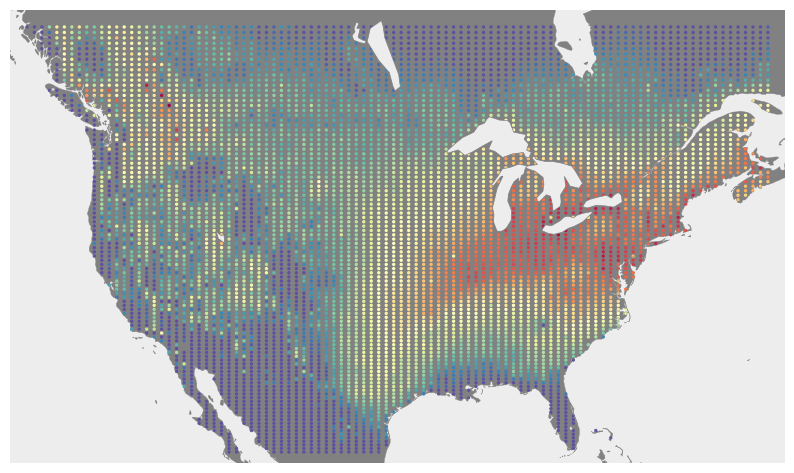

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from rasterio.warp import calculate_default_transform, reproject, Resampling
import matplotlib.pyplot as plt

extent = [-131.53, -61.46, 24.09, 54.90]

map_projection = ccrs.Mercator() 

great_lakes = cfeature.NaturalEarthFeature(category='physical', name='lakes', scale='110m')

shapefile_path = 'data/shapefiles/ne_110m_land/ne_110m_land.shp'
gdf = gpd.read_file(shapefile_path)

lakes_shapefile_path = 'data/shapefiles/ne_110m_lakes/ne_110m_lakes.shp'
lakes_gdf = gpd.read_file(lakes_shapefile_path)

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': map_projection})
ax.set_extent(extent, crs=ccrs.PlateCarree())  

ax.add_feature(cfeature.LAND, facecolor='#818181', edgecolor='gray', linewidth=.5)
ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
ax.add_feature(great_lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')


ax.scatter(america_points['lon'], america_points['lat'], transform=ccrs.PlateCarree(), 
           c=america_points['dist'], cmap='Spectral', vmin=mahal_distances.min(), vmax =mahal_distances_eur.max(), s=2)

ax.axis('off')


(-14641852.624039328, -6841695.90415462, 2746944.401339209, 7307496.882081329)

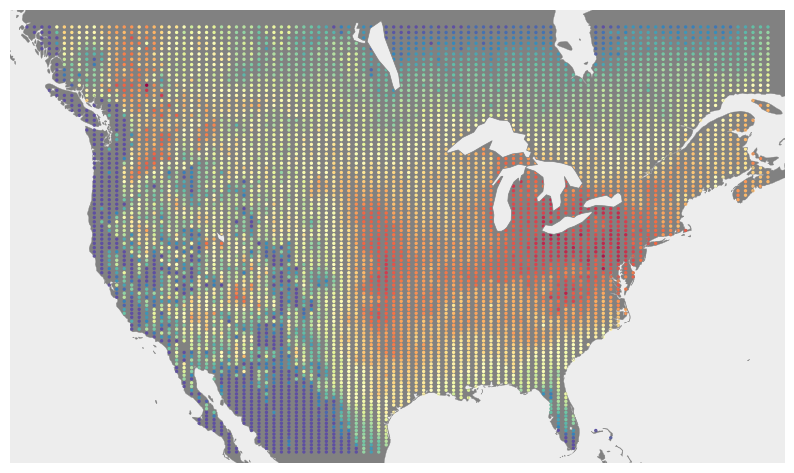

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': map_projection})
ax.set_extent(extent, crs=ccrs.PlateCarree())  

ax.add_feature(cfeature.LAND, facecolor='#818181', edgecolor='gray', linewidth=.5)
ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
ax.add_feature(great_lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')


ax.scatter(america_points['lon'], america_points['lat'], transform=ccrs.PlateCarree(), 
           c=mahal_raw_distances, cmap='Spectral', vmin=mahal_raw_distances.min(), vmax =mahal_raw_eur_distances.max(), s=2)

ax.axis('off')


(-10.11298075, 46.55047775, 33.71471915, 61.16589785)

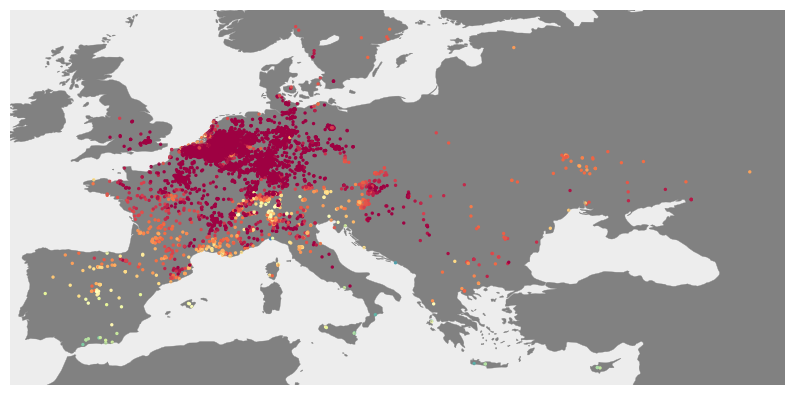

In [ ]:
plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax = plt.gca()

ax.add_feature(cfeature.LAND, facecolor='#818181', edgecolor='gray', linewidth=.5)
ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
ax.add_feature(great_lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')

ax.scatter(osmia_coords['lon'], osmia_coords['lat'], transform=ccrs.PlateCarree(), 
           c=mahal_distances_eur, s=2, cmap='Spectral', vmin=2, vmax = 8)
ax.axis('off')

# plt.savefig('eur_mahal.png', format='png', dpi=300)